In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [4]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 6s 0us/step


In [5]:
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ffa40b9f208> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b9ef0c50> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b9eb59e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff9b9eb5d68> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b9eb5e48> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b9669dd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff9b9683978> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b96837b8> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b00444a8> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b0044da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff9b0049ac8> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b0049908> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b00525f8> False
<keras.layers.convolutional.Conv2D object at 0x7ff9b0052ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff9b0059c18>

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model = models.Sequential()

In [8]:
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 3591      
Total params: 40,934,215
Trainable params: 33,298,951
Non-trainable params: 7,635,264
__________________________________

In [0]:
train_dir = '/content/drive/My Drive/samples/train'
validation_dir = '/content/drive/My Drive/samples/test'

In [0]:
import numpy as np
from random import shuffle

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 62
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 1114 images belonging to 7 classes.
Found 280 images belonging to 7 classes.


In [12]:
print (train_generator.class_indices)

{'101-151,0-30,50-90': 0, '101-151,62-92,132-172': 1, '101-151,93-123,173-213': 2, '152-202,31-61,132-172': 3, '203-253,31-61,50-90': 4, '50-100,0-30,173-213': 5, '50-100,31-61,91-131': 6}


In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/17 [>.............................] - ETA: 19:25 - loss: 2.4314 - acc: 0.1290

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/17 [==>...........................] - ETA: 15:14 - loss: 2.7654 - acc: 0.1290

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/17 [====>.........................] - ETA: 14:31 - loss: 2.5317 - acc: 0.1559

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/17 [=====>........................] - ETA: 13:25 - loss: 2.4200 - acc: 0.1504

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/17 [=======>......................] - ETA: 12:06 - loss: 2.3378 - acc: 0.1623

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/17 [=========>....................] - ETA: 11:07 - loss: 2.2568 - acc: 0.1757

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/17 [==========>...................] - ETA: 10:16 - loss: 2.1997 - acc: 0.1968

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/17 [============>.................] - ETA: 9:17 - loss: 2.1492 - acc: 0.2085 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/17 [==============>...............] - ETA: 8:19 - loss: 2.1115 - acc: 0.2122

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/17 [===============>..............] - ETA: 7:21 - loss: 2.0719 - acc: 0.2249

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/17 [=================>............] - ETA: 6:25 - loss: 2.0448 - acc: 0.2294

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/17 [===================>..........] - ETA: 5:28 - loss: 2.0079 - acc: 0.2358

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/17 [====================>.........] - ETA: 4:32 - loss: 1.9928 - acc: 0.2338

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/17 [======================>.......] - ETA: 3:36 - loss: 1.9839 - acc: 0.2379

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/17 [========================>.....] - ETA: 2:41 - loss: 1.9864 - acc: 0.2371

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/17 [=========================>....] - ETA: 1:46 - loss: 1.9590 - acc: 0.2495

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/17 [===========================>..] - ETA: 52s - loss: 1.9475 - acc: 0.2529 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/17 [==============================] - 1142s 63s/step - loss: 1.9450 - acc: 0.2504 - val_loss: 1.8672 - val_acc: 0.1821
Epoch 2/30
18/17 [==============================] - 155s 9s/step - loss: 1.6238 - acc: 0.3268 - val_loss: 1.9747 - val_acc: 0.3357
Epoch 3/30
18/17 [==============================] - 255s 14s/step - loss: 1.4826 - acc: 0.3761 - val_loss: 2.1924 - val_acc: 0.2857
Epoch 4/30
18/17 [==============================] - 255s 14s/step - loss: 1.4347 - acc: 0.4246 - val_loss: 1.7412 - val_acc: 0.3107
Epoch 5/30
18/17 [==============================] - 258s 14s/step - loss: 1.3945 - acc: 0.4336 - val_loss: 1.9613 - val_acc: 0.2071
Epoch 6/30
18/17 [==============================] - 255s 14s/step - loss: 1.3223 - acc: 0.4560 - val_loss: 1.8548 - val_acc: 0.2607
Epoch 7/30
18/17 [==============================] - 254s 14s/step - loss: 1.2397 - acc: 0.5018 - val_loss: 1.7388 - val_acc: 0.2857
Epoch 8/30
18/17 [==============================] - 258s 14s/step - loss: 1.1963 - acc:

In [14]:
#Save model to json
import os
model.save_weights("vggnpk.h5")
print("model saved to disk....")

model saved to disk....


In [0]:
##Prediction Part
import numpy as np
from keras.preprocessing import image

In [0]:
img_pred = image.load_img('/content/drive/My Drive/samples/train/50-100,0-30,173-213/1 (100).jpg', target_size = (224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = model.predict(img_pred)

In [0]:
model.load_weights('vggnpk.h5')

In [0]:
class_names = {0: '50-100,0-30,173-213', 1: '50-100,31-61,91-131' , 2:'101-151,0-30,50-90' , 3:'101-151,62-92,132-172' , 4:'101-151,93-123,173-213' , 5:'152-202,31-61,132-172' , 6:'203-253,31-61,50-90'}

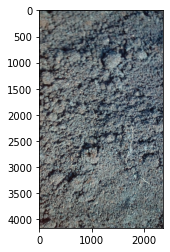

In [19]:
for img in os.listdir("/content/drive/My Drive/samples/train"):
    import cv2
    img3 = cv2.imread('/content/drive/My Drive/samples/train/50-100,0-30,173-213/1 (100).jpg')  
    plt.imshow(img3)

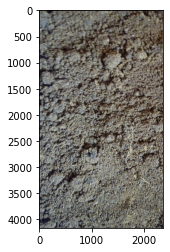

In [20]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

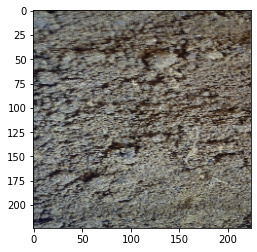

In [21]:
img3 = cv2.resize(img3,(224,224))
plt.imshow(img3)

In [0]:
img4 = np.reshape(img3,[1,224,224,3])

In [23]:
out = model.predict(img4) 
print (np.argmax(out))
print(class_names[np.argmax(out)])

6
203-253,31-61,50-90
